In [ ]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [ ]:
# df = pd.read_csv("https://tinyurl.com/2pfhncqw")
df = pd.read_csv('nfts_train - nfts_train.csv')
df.head()

<ipython-input-3-db3e31204d31>:2: DtypeWarning: Columns (11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nfts_train - nfts_train.csv')


,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250.0,False,False,True,True,False,31.0,187.967742,8.290323,60.935484,0.0,0.0,2.0,591.0,28.0,380.0
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250.0,False,False,True,True,False,11.0,133.181818,13.454545,55.181818,0.0,0.0,7.0,402.0,47.0,239.0
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250.0,False,False,True,True,False,11.0,133.181818,13.454545,55.181818,0.0,0.0,7.0,402.0,47.0,239.0
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250.0,False,False,True,True,False,11.0,133.181818,13.454545,55.181818,0.0,0.0,7.0,402.0,47.0,239.0
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250.0,False,False,True,True,False,11.0,133.181818,13.454545,55.181818,0.0,0.0,7.0,402.0,47.0,239.0


In [ ]:
pd.pivot_table(df, index='verification_status', columns='contract_type', values=['rarity_score', 'last_sale_price'], aggfunc='sum')

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv("https://tinyurl.com/2r24n45l")
df2.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [ ]:
# import re
# int(re.findall(r'\d{4}', str(2015))[0])
# lambda x : re.findall(r'\d{4}', str(x))[0]

In [ ]:
pt = df.query('2018 <= year <= 2022 ').pivot_table(index='Brand', columns='Year', values=['Price', 'Miles'], aggfunc={'Price': 'mean', 'Miles': 'median'})
pt['Miles'].plot(kind='kde')
pt['Price'].plot(kind='kde')

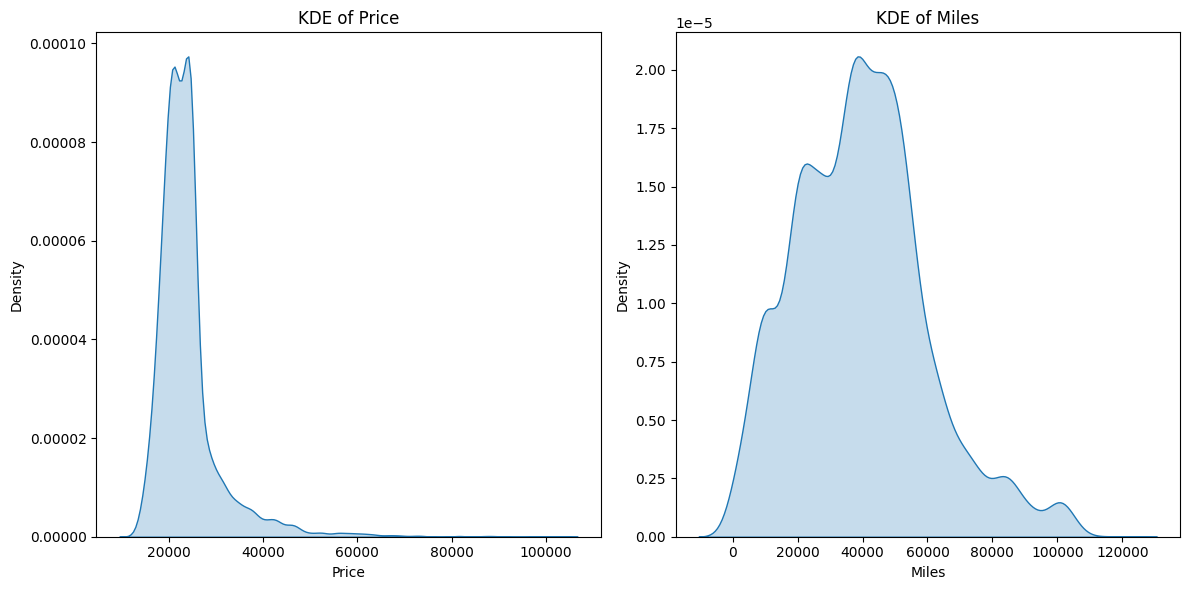

In [ ]:
# df2['Name'].str.split().str.get(0)
df2['Brand'] = df2['Name'].str.split().str[0]
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')
df2 = df2[df2['Year'].between(2018, 2022)]
pivot_table = pd.pivot_table(df2, index='Brand', columns='Year', values=['Price', 'Miles'],  aggfunc={'Price': 'mean', 'Miles': 'median'})
pivot_table.columns = ['_'.join([str(col[1]), col[0]]) for col in pivot_table.columns]


plt.figure(figsize=(12, 6))

# KDE plot for Price
plt.subplot(1, 2, 1)
sns.kdeplot(data=df2, x='Price', fill=True)
plt.title('KDE of Price')

# KDE plot for Miles
plt.subplot(1, 2, 2)
sns.kdeplot(data=df2, x='Miles', fill=True)
plt.title('KDE of Miles')

plt.tight_layout()
plt.show()

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [ ]:
df = pd.read_csv("https://tinyurl.com/2nq6kugt")

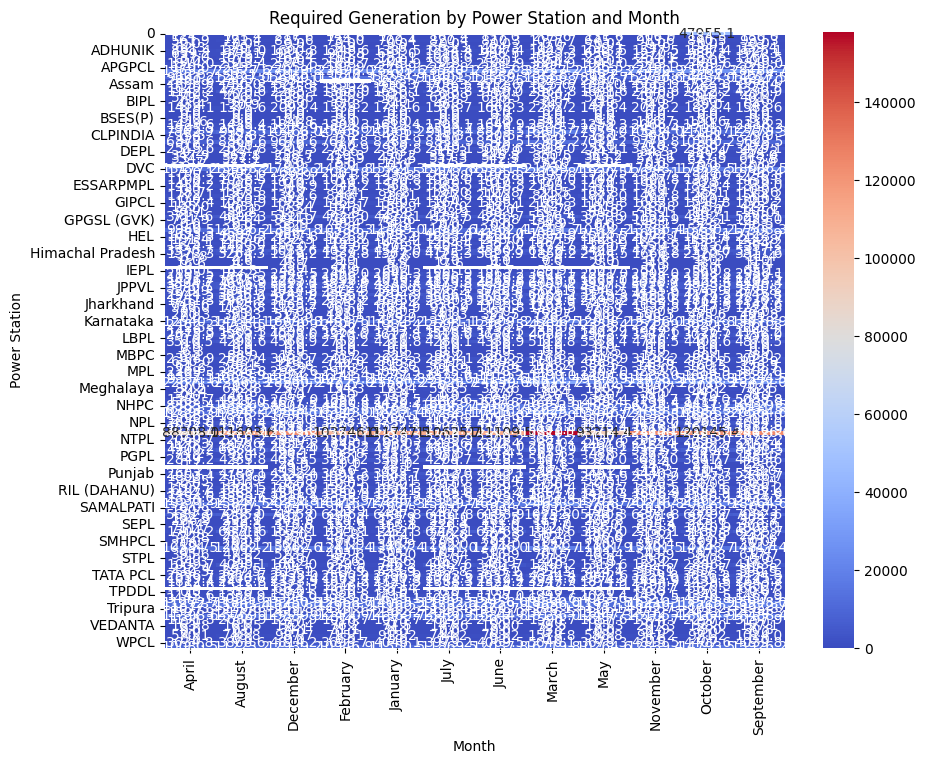

In [ ]:
df['Required Generation (MU)'] = df['Actual(MU)'] - df['Excess(+) / Shortfall (-)']
df['Dates'] = pd.to_datetime(df['Dates'])
df['Month'] = df['Dates'].dt.month_name()
top_10_power_stations = df['Power Station'].value_counts().head(10)
pivot_table = df.pivot_table(index='Power Station', columns='Month', values='Required Generation (MU)', aggfunc='sum')
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Required Generation by Power Station and Month')
plt.show()

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [ ]:
df = pd.read_csv('question-answer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20 non-null     int64 
 1   2           20 non-null     object
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
df.columns

Index(['Unnamed: 0', '2'], dtype='object')

In [ ]:
df.columns = ['index', 'content']

questions = []
answers = []

for row in df['content']:
    if row.startswith('Q'):
        questions.append(row)
    elif row.startswith('Ans'):
        answers.append(row)

qa_df = pd.DataFrame({'question': questions, 'answer': answers})
qa_df

,question,answer
0,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
1,Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
2,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...
3,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
4,Q5-You are given a data set consisting of vari...,Ans5-The following are ways to handle missing ...
5,Q6-What is bag of words? How we can use it for...,Ans6-Bag of Words is a representation of text ...
6,Q7-How can we use machine learning for text cl...,Ans7-Machine learning classification algorithm...
7,Q8-What is a time series?,Ans8-A time series is a set of observations or...
8,Q9-How is time series different from the usual...,Ans9-The principle behind causal forecasting i...
9,Q10-What are the different types of joins? Wha...,Ans10-(INNER) JOIN: Returns records that have ...


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [ ]:
no_question_mark_df = qa_df[qa_df['question'].apply(lambda x: '?' not in x)]
for index, row in no_question_mark_df.iterrows():
    print(f"Question: {row['question']}")
    print(f"Answer: {row['answer']}\n")

###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [ ]:
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")


In [ ]:
log_file['dt'] = pd.to_datetime(log_file['dt'])  # Convert 'dt' to datetime format
log_file['month'] = log_file['dt'].dt.strftime('%B')  # Extract month name

activity_month_wise = log_file.groupby(['month', 'activity']).size().reset_index(name='count')
activity_month_wise

,month,activity,count
0,April,Checking,5
1,April,Cleaning,11
2,April,Inspection,9
3,April,Repair,5
4,August,Checking,8
5,August,Cleaning,10
6,August,Inspection,9
7,August,Repair,4
8,December,Checking,6
9,December,Cleaning,7


In [ ]:
january_activities = log_file[log_file['month'] == 'January']
top_employee_january = january_activities.groupby('emp_id').size().reset_index(name='count').sort_values(by='count', ascending=False).head(1)
top_employee_january = pd.merge(top_employee_january, employee, left_on='emp_id', right_on='EMPLOYEE_ID')
top_employee_january

,emp_id,count,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,122,3,122,Payam,Kaufling,PKAUFLING


In [ ]:
log_file['day_of_week'] = log_file['dt'].dt.day_name()
weekend_activities = log_file[log_file['day_of_week'].isin(['Saturday', 'Sunday'])]
top_weekend_employee = weekend_activities.groupby('emp_id').size().reset_index(name='count').sort_values(by='count', ascending=False).head(1)
top_weekend_employee = pd.merge(top_weekend_employee, employee, left_on='emp_id', right_on='EMPLOYEE_ID')
top_weekend_employee

,emp_id,count,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL


In [ ]:
business_days_activities = log_file[log_file['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
top_business_activity = business_days_activities.groupby('activity').size().reset_index(name='count').sort_values(by='count', ascending=False).head(1)
top_business_activity

,activity,count
2,Inspection,77


In [ ]:
weekday_activity_table = log_file.groupby(['day_of_week', 'activity']).size().unstack(fill_value=0)
weekday_activity_table

activity,Checking,Cleaning,Inspection,Repair
day_of_week,,,,
Friday,8,16,20,9
Monday,10,14,13,15
Saturday,18,11,8,15
Sunday,13,13,15,11
Thursday,8,16,16,12
Tuesday,15,9,15,13
Wednesday,14,9,13,16


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [ ]:
missing_first_name = employee['FIRST_NAME'].isna()
employee.loc[missing_first_name, 'FIRST_NAME'] = employee.loc[missing_first_name].apply(
    lambda row: row['EMAIL'][:len(row['EMAIL']) - len(row['LAST_NAME'])], axis=1)

In [ ]:
# Add the domain '@campusx.com' to all email addresses
employee['EMAIL'] = employee['EMAIL'].str.upper() + '@CAMPUSX.COM'

In [ ]:
merged_log = pd.merge(log_file, employee, left_on='emp_id', right_on='EMPLOYEE_ID')
employees_with_A = merged_log[merged_log['FIRST_NAME'].str.startswith('A', na=False)]
specific_activities = employees_with_A[employees_with_A['activity'].isin(['Inspection', 'Cleaning', 'Checking'])]
specific_activities.loc[:, 'FULL_NAME'] = specific_activities['FIRST_NAME'] + ' ' + specific_activities['LAST_NAME']
result = specific_activities[['FULL_NAME', 'activity']].drop_duplicates()
result


<ipython-input-64-e8b2177b9c20>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_activities.loc[:, 'FULL_NAME'] = specific_activities['FIRST_NAME'] + ' ' + specific_activities['LAST_NAME']


,FULL_NAME,activity
0,Alexander Khoo,Cleaning
4,Alexander Khoo,Checking
235,Alexander Hunold,Checking
237,Alexander Hunold,Cleaning
294,A Fripp,Inspection
